<a href="https://colab.research.google.com/github/175907/Fasttravel_rich/blob/main/Exploratory_Data_Analysis_for_Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Group Members: Gbenro Keitiku And Olamilekan Ilesanmi


Class: IT 331 (A)

Exploratory Data Analysis (EDA) on malicious URLs is a critical process that starts with collecting and cleaning data from trusted sources to ensure safety during analysis. This process includes breaking down URLs into components and extracting features like domain characteristics and secure protocol usage, which are vital for identifying threats. Through statistical analysis and visualization, EDA helps uncover patterns and anomalies in the data, aiding in the detection of suspicious URLs. The insights gained from EDA reveal trends and targeted sectors, which are instrumental in understanding cyber threats. Additionally, this analysis sets the stage for applying machine learning by preparing the data and enhancing features based on the insights gained, ultimately aiding cybersecurity experts in developing more effective defense mechanisms against online malicious activities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report


print("Imported all necessary packages")
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

Imported all necessary packages


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Malicious URLs.csv')

This line reads the CSV file named 'Malicious URLs.csv'


**Initial Data Exploration with Pandas in Python**

Preliminary data examination, allowing to formulate appropriate questions and hypothesis tests, and to plan further analyses.


In [4]:
df.shape

(333387, 2)

In [5]:
df.head()

,URLs,Class
0,badminton2008.com/938fhnr3?kqgqaEa=vSwtSiemz,bad
1,mphtadhci5mrdlju.tor2web.org/,bad
2,stocktradex.com/087gbdv4,bad
3,walterrosales.com/js/realbusiness/,bad
4,myhomemusic.net/,bad


In [6]:
df.columns

Index(['URLs', 'Class'], dtype='object')

In [7]:
df.dtypes

URLs     object
Class    object
dtype: object

In [8]:
df.describe()

,URLs,Class
count,333387,333387
unique,324179,2
top,103.234.36.75/rd927.exe,good
freq,27,257744


Moving on to Data Preparation


Identifying relevant rows and columns
Feature Creation

In [9]:
df.isna().sum()

URLs     0
Class    0
dtype: int64

In [10]:
df.loc[df.duplicated()]

,URLs,Class
510,dbplumbingnt.com.au/file/files/db/file.dropbox/,bad
934,benditas.net.br/wp-content/message/,bad
1010,bandkhasi.net/1avsq,bad
1298,5n7y4yihirccftc5.tor2web.org/,bad
1358,dipp.lt/id4e6xcs,bad
...,...,...
246602,tricity.wsu.edu/,good
291379,sites.google.com/a/connectory.org/world-connec...,good
305617,lhs-sfusd-ca.schoolloop.com/,good
323147,dnr.mo.gov/shpo/Jackson.htm,good


In [11]:
df.loc[df.duplicated(subset='Class')]

,URLs,Class
1,mphtadhci5mrdlju.tor2web.org/,bad
2,stocktradex.com/087gbdv4,bad
3,walterrosales.com/js/realbusiness/,bad
4,myhomemusic.net/,bad
5,aquatixbottle.com/vkZuz9,bad
...,...,...
333382,musicianspage.com/musicians/13871,good
333383,coatingsworld.com/contents/view_breaking-news/...,good
333384,artfact.com/artist/avery-milton-clark-kianfqzygj,good
333385,nunsandsisters.com/grey_nun.html,good


Visualizing the distribution of the most common URLs in the dataset. By examining the pie chart, histogram to quickly see if certain URLs dominate the dataset, which could be a point of interest for further investigation, especially if some of these prevalent URLs are known to be malicious or benign. This visualization helps in understanding the data's composition and identifying potential patterns or anomalies worth exploring in more depth.

<Axes: ylabel='count'>

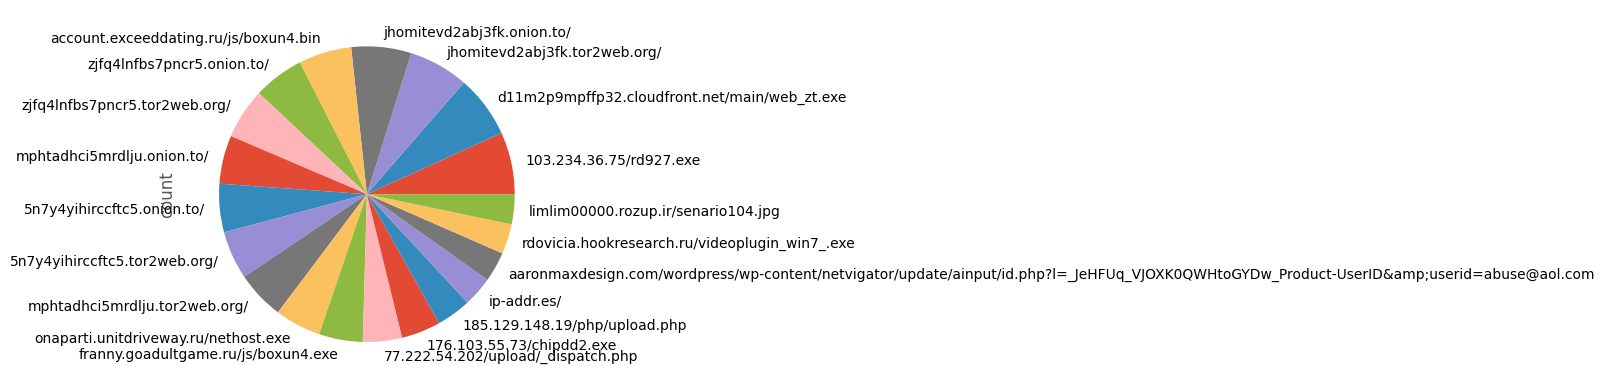

In [12]:
df['URLs'].value_counts() \
.head(20) \
.plot(kind='pie')

<Axes: title={'center': 'Common Used URLs'}, ylabel='Frequency'>

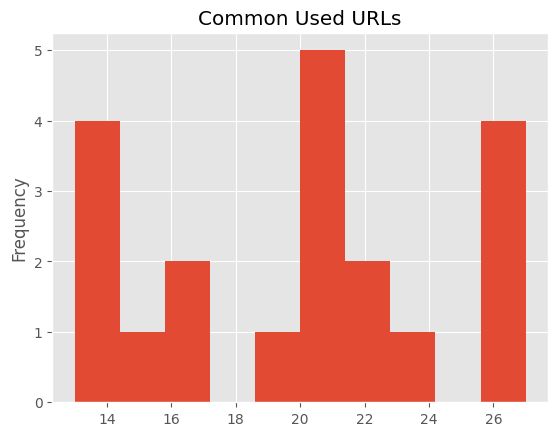

In [13]:
df['URLs'].value_counts() \
.head(20) \
.plot(kind='hist',title='Common Used URLs')

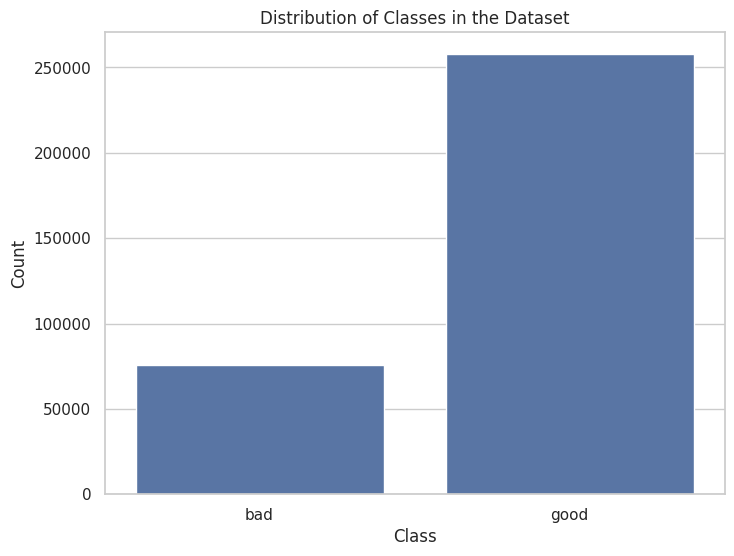

In [14]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<ipython-input-15-adc8cedcd946>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_urls.values, y=top_urls.index, palette="viridis")


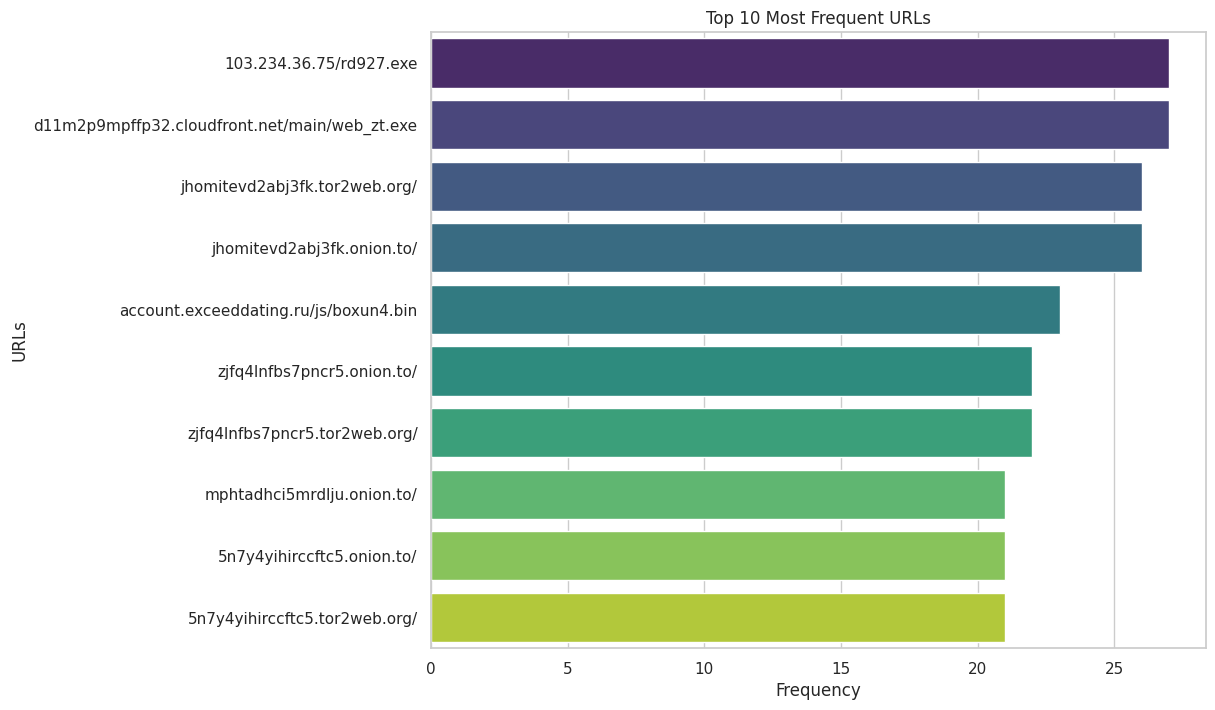

In [15]:
# Plotting the top 10 most frequent URLs
top_urls = df['URLs'].value_counts().head(10)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_urls.values, y=top_urls.index, palette="viridis")
plt.title('Top 10 Most Frequent URLs')
plt.xlabel('Frequency')
plt.ylabel('URLs')
plt.show()

**FEATURE UNDERSTANDING**

Plotting interpretative feature Ditributions

Derive and analyze new features from URLs that could potentially help in identifying malicious URLs. It highlights how features like URL length and the use of HTTPS protocol might vary between malicious and benign URLs, providing insights that could improve the accuracy of malicious URL detection models.

In [16]:
df['URL_length'] = df['URLs'].apply(len)

# Feature to check if the URL uses HTTPS
df['HTTPS'] = df['URLs'].apply(lambda x: 1 if 'https://' in x else 0)

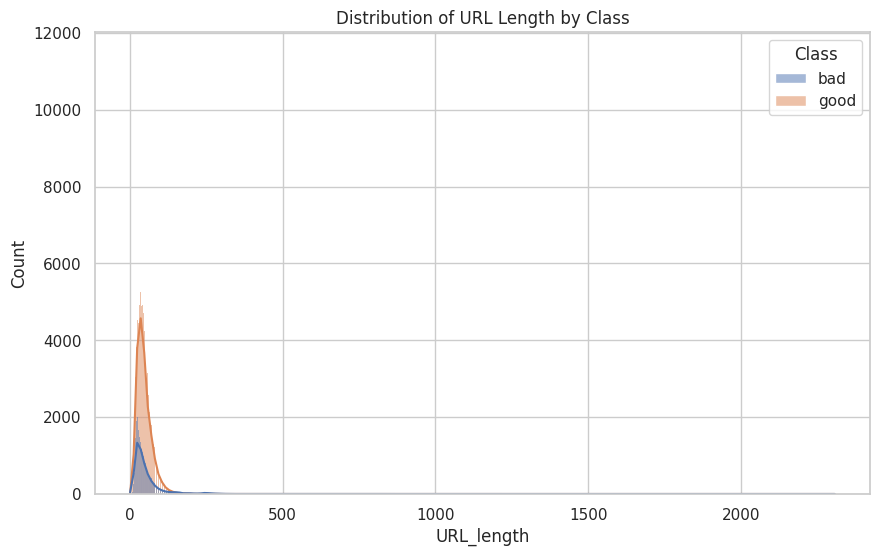

In [17]:
# Distribution of URL length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='URL_length', hue='Class', kde=True)
plt.title('Distribution of URL Length by Class')
plt.show()

This plot helps to understand the relationship between the use of HTTPS and the likelihood of a URL being classified as malicious or benign. It could reveal patterns such as a higher prevalence of HTTPS among benign URLs or vice versa, providing insights into whether the usage of HTTPS is a significant factor in classifying URLs as malicious or benign.

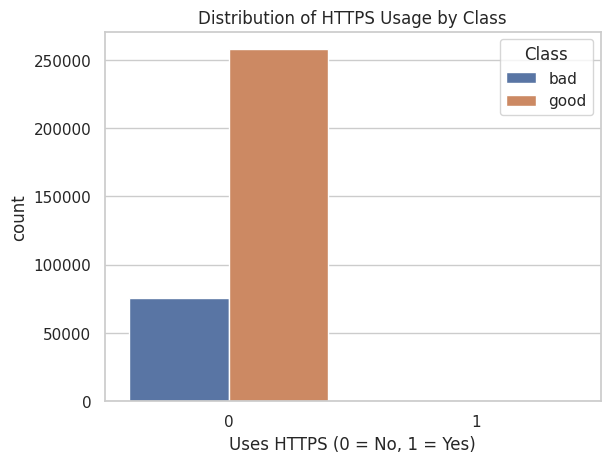

In [18]:
# Countplot for HTTPS feature
sns.countplot(x='HTTPS', hue='Class', data=df)
plt.title('Distribution of HTTPS Usage by Class')
plt.xlabel('Uses HTTPS (0 = No, 1 = Yes)')
plt.show()

Crucial for understanding the composition of the datasets and ensuring that both training and testing sets have a representative distribution of classes, which is essential for training and evaluating machine learning models accurately in the context of identifying malicious URLs.

In [19]:
# Seperate the Training and Test data

test_percentage = .2
train_df, test_df = train_test_split(df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("Seperated training and test data")

Seperated training and test data


Training Samples: 266709
Testing Samples: 66678


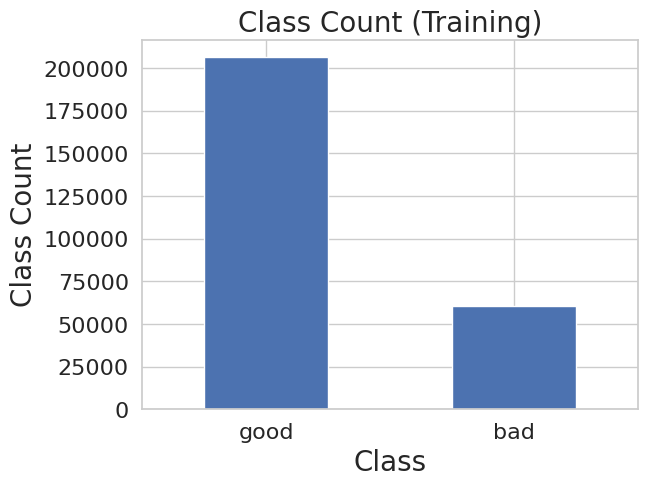

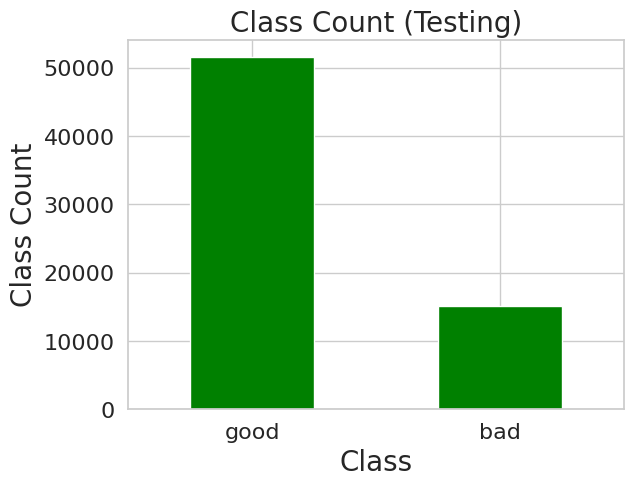

In [20]:
# Display each class
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

a.Exploratory Data Analysis (EDA): The code demonstrates essential EDA techniques such as checking the shape of the DataFrame, viewing the first few entries with df.head(), examining column names and data types, and summarizing the dataset with df.describe(). Additionally, it checks for missing values and duplicates, which are critical steps in preprocessing data for accurate analysis.


b. Visualization: Several types of visualizations are used to explore the data further. For instance, the use of pie charts, histograms, and bar plots to visualize the distribution of URLs and classes in the dataset. Seaborn's aesthetic settings enhance the visual appeal and readability of plots, making it easier to derive insights from the visual data.


c. Feature Engineering: The code illustrates how to create new features from existing data, which can be crucial for improving model performance. For example, a new feature URL_length is derived from the length of the URLs, and a binary feature HTTPS indicates whether a URL uses HTTPS. These engineered features can provide significant inputs for machine learning models.



Overall, the code provides a comprehensive foundation for preprocessing, exploring, and preparing data for further analysis or building predictive models, illustrating best practices in handling and visualizing data effectively in Python.